### **Pré-requisitos**

In [177]:
import importlib, os 
if importlib.util.find_spec("cv2") is None:
    !pip install opencv-python
if importlib.util.find_spec("pprint") is None:
    !pip install pprint
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
if not os.path.exists('suporte/yoda.jpg'):
    !wget https://github.com/Paulojct1/SMULT_2020_2/raw/master/yoda.jpg -P suporte/


In [178]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

In [179]:
def graph_size(n):
    """Função auxiliar para definir tamanho dos gráficos"""
    return (n*(1+5**0.5)/2, n)

def imshow(im, cmap='gray'):
    if len(im.shape) == 2 or (len(im.shape) == 3 and im.shape[2] == 1):
        plt.imshow(im, cmap=cmap, norm=plt.Normalize(vmin=0, vmax=255))
    else:
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [180]:
img01 = cv2.cvtColor(cv2.imread('suporte/face.png'), cv2.COLOR_BGR2GRAY)
img02 = cv2.cvtColor(cv2.imread('suporte/cameraman.png'), cv2.COLOR_BGR2GRAY)
img03 = cv2.cvtColor(cv2.imread('suporte/fruits.png'), cv2.COLOR_BGR2GRAY)
img04 = cv2.cvtColor(cv2.imread('suporte/baboon.png'), cv2.COLOR_BGR2GRAY)

**Fontes:** 
- Imagem `yoda.jpg` ([Yoda](https://i.pinimg.com/originals/51/6b/de/516bdeb5430b185cd79f5acbf4af8213.png))

# **Projeto Final: Imagens**
# *Paulo José Carmona Teixeira - 11611ECP018*

## * Requisitos *

Com base no que vocês assistiram na aula 13 (assíncrona), façam um notebook que, a partir de uma imagem à sua escolha (pode ser sua foto, a foto de algo que você goste ou mesmo alguma imagem com que você se identifique), mostrando:

* a imagem original;
* o espectro 2D da imagem modificado para que o limite de Nyquist esteja nas bordas; 
* o resultado da convolução alguns filtros daqueles apresentados (um mínimo de 4 distintos) aplicados à imagem original.

## **A Imagem Original.**


![Yoda](https://i.pinimg.com/originals/51/6b/de/516bdeb5430b185cd79f5acbf4af8213.png)

In [181]:
yoda = cv2.imread('suporte/yoda.jpg')
print(type(yoda), yoda.shape, yoda.dtype)

print(yoda[:,:,0], yoda[:,:,1], yoda[:,:,2], sep='\n')

<class 'numpy.ndarray'> (256, 256, 3) uint8
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


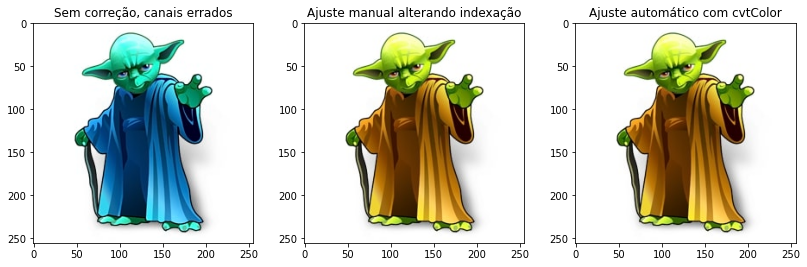

In [182]:
plt.figure(figsize=graph_size(7))

plt.subplot(131)
plt.imshow(yoda) 
plt.title("Sem correção, canais errados")

plt.subplot(132)
plt.imshow(yoda[:,:,[2,1,0]]) 
plt.title("Ajuste manual alterando indexação")

plt.subplot(133)
plt.imshow(cv2.cvtColor(yoda, cv2.COLOR_BGR2RGB))
plt.title("Ajuste automático com cvtColor")

plt.tight_layout()
plt.show()

In [183]:
yoda_gray = np.uint8(np.round(0.299*yoda[:,:,2] + 0.587*yoda[:,:,1] + 0.114*yoda[:,:,0]))

print(type(yoda_gray), yoda_gray.shape, yoda_gray.dtype)
print('nível mínimo:', np.min(yoda_gray), '| nível máximo:', np.max(yoda_gray))

<class 'numpy.ndarray'> (256, 256) uint8
nível mínimo: 0 | nível máximo: 255


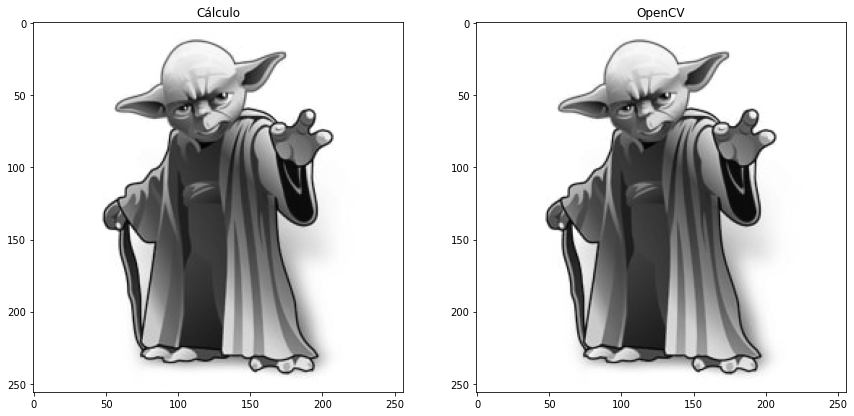

In [184]:
plt.figure(figsize=graph_size(9))
plt.subplot(121)
imshow(yoda_gray)
plt.title('Cálculo')
plt.subplot(122)
lena_gray = cv2.cvtColor(yoda, cv2.COLOR_BGR2GRAY) #
imshow(yoda_gray)
plt.title('OpenCV')
plt.show()

## **O espectro 2D da imagem modificado para que o limite de Nyquist esteja nas bordas.**

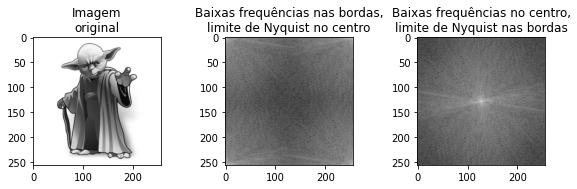

In [185]:
yoda_nq = cv2.cvtColor(cv2.imread('suporte/yoda.jpg'), cv2.COLOR_BGR2GRAY)
spec = np.fft.fft2(yoda_nq)
specshift = np.fft.fftshift(spec) 

plt.figure(figsize=graph_size(5))
plt.subplot(131)
imshow(yoda_nq, cmap="gray")
plt.title('Imagem\noriginal')

plt.subplot(132)
plt.imshow(20*np.log10(np.abs(spec)), cmap="gray")
plt.title('Baixas frequências nas bordas,\nlimite de Nyquist no centro')

plt.subplot(133)
plt.imshow(20*np.log10(np.abs(specshift)), cmap="gray")
plt.title('Baixas frequências no centro,\nlimite de Nyquist nas bordas')

plt.tight_layout()
plt.show()

### *FPA Quadrado: Filtro Passa-Alta Quadrado*


In [186]:
@interact(delta=(1,127,1), plasma=True)
def show_hpf(delta=30, plasma=True):
    rows, cols = yoda_gray.shape
    crow,ccol = rows//2 , cols//2
    filtr = np.ones((rows, cols))
    filtr[crow-delta:crow+delta+1, ccol-delta:ccol+delta+1] = 0
    
    f = np.fft.fft2(yoda_gray)
    fshift = np.fft.fftshift(f)
    fshift = fshift*filtr 
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back)

    plt.figure(figsize=graph_size(12))
    plt.subplot(121)
    imshow(yoda_gray)
    plt.title('Imagem original')
    plt.subplot(122)
    imshow(img_back, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem depois do FPA Quadrado'), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(IntSlider(value=30, description='delta', max=127, min=1), Checkbox(value=True, descripti…

### *Filtros FPA e FPB Gaussianos*



In [187]:
@interact(delta=(1,127,1), plasma=True, passa_alta=True, ruido=False)
def show_hpf(delta=30, plasma=True, passa_alta=True, ruido=False):
    rows, cols = yoda_gray.shape
    gaus2d = gaussian_img(rows, cols, delta)
    
    noise = np.random.randint(low=0, high=32, size=yoda_gray.shape)  if ruido else np.zeros_like(yoda_gray)
    yoda_mod = yoda_gray + noise
    
    f = np.fft.fft2(yoda_mod)
    fshift = np.fft.fftshift(f)
    fshift = fshift*((1-gaus2d) if passa_alta else gaus2d) 
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back)

    plt.figure(figsize=graph_size(12))
    plt.subplot(121)
    imshow(yoda_mod)
    plt.title('Imagem original')
    plt.subplot(122)
    imshow(img_back, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem depois do ' + ('FPA' if passa_alta else 'FPB') + ' Gaussiano'), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(IntSlider(value=30, description='delta', max=127, min=1), Checkbox(value=True, descripti…

## **O resultado da convolução com filtros aplicados à Imagem Original.**





In [188]:
kernel = {
    'identity': np.array([[0,0,0],[0,1,0],[0,0,0]], dtype=float),
    'edge detection': np.array([[1,0,-1],[0,0,0],[-1,0,1]], dtype=float),
    'laplacian': np.array([[0,-1,0],[-1,4,-1],[0,-1,0]], dtype=float),
    'laplacian w/ diagonals': np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype=float),
    'laplacian of gaussian': np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]], dtype=float),
    'scharr': np.array([[-3, 0, 3],[-10,0,10],[-3, 0, 3]], dtype=float),
    'sobel edge horizontal': np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=float),
    'sobel edge vertical': np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=float),
    'line detection horizontal': np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]], dtype=float),
    'line detection vertical': np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]], dtype=float),
    'line detection 45°': np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]], dtype=float),
    'line detection 135°': np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]], dtype=float),
    'box blur': (1/9)*np.ones((3,3), dtype=float),
    'gaussian blur 3x3': (1/16)*np.array([[1,2,1],[2,4,2],[1,2,1]], dtype=float),
    'gaussian blur 5x5': (1/256)*np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]], dtype=float),
    'sharpen': np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], dtype=float),
    'unsharp masking': (-1/256)*np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,-476,24,6],[4,16,24,16,4],[1,4,6,4,1]], dtype=float),
}
for k,v in kernel.items():
    print(k, np.sum(v))

identity 1.0
edge detection 0.0
laplacian 0.0
laplacian w/ diagonals 0.0
laplacian of gaussian 0.0
scharr 0.0
sobel edge horizontal 0.0
sobel edge vertical 0.0
line detection horizontal 0.0
line detection vertical 0.0
line detection 45° 0.0
line detection 135° 0.0
box blur 1.0
gaussian blur 3x3 1.0
gaussian blur 5x5 1.0
sharpen 1.0
unsharp masking 1.0


In [195]:
from scipy import signal

@interact(figura='Yoda', nucleo=kernel.keys(), scipy=False, plasma=False)
def show_convolve(figura, nucleo, scipy, plasma):
    if figura == 'Yoda':
        img = yoda_gray.copy()
    if not scipy:
        conv = convolve(img, kernel[nucleo], fft=True)
    else:
        conv = signal.fftconvolve(img, kernel[nucleo], mode='same')
    conv[conv < 0] = 0
    conv[conv > 255] = 255
    conv = np.uint8(np.round(conv))
    plt.figure(figsize=graph_size(12))
    plt.subplot(121)
    imshow(img, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem original')
    plt.subplot(122)
    imshow(conv, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem convoluída'), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(Text(value='Yoda', description='figura'), Dropdown(description='nucleo', options=('ident…

### *Filtro Laplacian*





O ***Laplacian*** de uma imagem destaca regiões de rápida mudança de intensidade e, portanto, é usado para detecção de bordas. 

Ele é frequêntemente aplicado a uma imagem que foi primeiro suavizada com algo que se aproxima de um filtro de suavização gaussiano para reduzir sua sensibilidade ao ruído e, portanto, as duas variantes serão descritas juntas aqui. 

O operador normalmente pega uma única imagem em nível de cinza como entrada e produz outra imagem em nível de cinza como saída.

A aplicação deste filtro na imagem abaixo apresentou corretamente as bordas, mas se comparado com o ***Laplacian de Gaussian*** cujo resultado na mesma imagem deixou a desejar quanto a quantidade de artefatos no imagem final. 



In [196]:
from scipy import signal

@interact(figura='Yoda',nucleo='laplacian', scipy=False, plasma=False)
def show_convolve(figura, nucleo, scipy, plasma):
    if figura == 'Yoda':
        img = yoda_gray.copy()
    if not scipy:
        conv = convolve(img, kernel['laplacian'], fft=True)
    else:
        conv = signal.fftconvolve(img, kernel['laplacian'], mode='same')
    conv[conv < 0] = 0
    conv[conv > 255] = 255
    conv = np.uint8(np.round(conv))
    plt.figure(figsize=graph_size(12))
    plt.subplot(121)
    imshow(img, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem original')
    plt.subplot(122)
    imshow(conv, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem convoluída'), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(Text(value='Yoda', description='figura'), Text(value='laplacian', description='nucleo'),…

### *Filtro Sharpen*

O processo do ***Sharpen*** é basicamente a aplicação de um filtro passa-alta a uma imagem para tornar uma imagem mais nítida aumenta o contraste entre as regiões claras e escuras para destacar os recursos. 

O filtro enfatizou as diferenças nos valores de pixels adjacentes na imagem, isso tornou a imagem mais vívida conforme demonstrado abaixo.


In [198]:
from scipy import signal

@interact(figura='Yoda',nucleo='sharpen', scipy=False, plasma=False)
def show_convolve(figura, nucleo, scipy, plasma):
    if figura == 'Yoda':
        img = yoda_gray.copy()
    if not scipy:
        conv = convolve(img, kernel['sharpen'], fft=True)
    else:
        conv = signal.fftconvolve(img, kernel['sharpen'], mode='same')
    conv[conv < 0] = 0
    conv[conv > 255] = 255
    conv = np.uint8(np.round(conv))
    plt.figure(figsize=graph_size(12))
    plt.subplot(121)
    imshow(img, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem original')
    plt.subplot(122)
    imshow(conv, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem convoluída'), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(Text(value='Yoda', description='figura'), Text(value='sharpen', description='nucleo'), C…

### *Filtro Edge Detection*

O filtro de ***Edge Detection*** cria uma imagem enfatizando as bordas.

Ele pode ser processado e visualizado como se fosse uma imagem, com as áreas de alto gradiente,as bordas, visíveis como linhas brancas.


In [197]:
from scipy import signal

@interact(figura='Yoda',nucleo='edge detection', scipy=False, plasma=False)
def show_convolve(figura, nucleo, scipy, plasma):
    if figura == 'Yoda':
        img = yoda_gray.copy()
    if not scipy:
        conv = convolve(img, kernel['edge detection'], fft=True)
    else:
        conv = signal.fftconvolve(img, kernel['edge detection'], mode='same')
    conv[conv < 0] = 0
    conv[conv > 255] = 255
    conv = np.uint8(np.round(conv))
    plt.figure(figsize=graph_size(12))
    plt.subplot(121)
    imshow(img, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem original')
    plt.subplot(122)
    imshow(conv, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem convoluída'), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(Text(value='Yoda', description='figura'), Text(value='edge detection', description='nucl…

### *Filtro Gaussian Blur*

O filtro ***Gaussian Blur*** é um efeito amplamente usado em softwares gráficos, normalmente para reduzir o ruído da imagem e reduzir os detalhes. 

O efeito visual dessa técnica de desfoque é um desfoque suave semelhante ao de ver a imagem através de uma tela translúcida, distintamente diferente do efeito bokeh produzido por uma lente fora de foco ou pela sombra de um objeto sob a iluminação normal. 


In [199]:
from scipy import signal

@interact(figura='Yoda',nucleo='gaussian blur 5x5', scipy=False, plasma=False)
def show_convolve(figura, nucleo, scipy, plasma):
    if figura == 'Yoda':
        img = yoda_gray.copy()
    if not scipy:
        conv = convolve(img, kernel['gaussian blur 5x5'], fft=True)
    else:
        conv = signal.fftconvolve(img, kernel['gaussian blur 5x5'], mode='same')
    conv[conv < 0] = 0
    conv[conv > 255] = 255
    conv = np.uint8(np.round(conv))
    plt.figure(figsize=graph_size(12))
    plt.subplot(121)
    imshow(img, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem original')
    plt.subplot(122)
    imshow(conv, cmap=('plasma' if plasma else 'gray'))
    plt.title('Imagem convoluída'), plt.xticks([]), plt.yticks([])
    plt.show()

interactive(children=(Text(value='Yoda', description='figura'), Text(value='gaussian blur 5x5', description='n…